In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
stars = pd.read_csv('hygdata_v3.csv')
stars.head()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


In [18]:
stars = stars[['proper', 'dist', 'mag', 'absmag', 'spect', 'ci', 'lum', 'var']]
stars.head()

,proper,dist,mag,absmag,spect,ci,lum,var
0,Sol,0.0000,-26.70,4.850,G2V,0.656,1.000000,NaN
1,NaN,219.7802,9.10,2.390,F5,0.482,9.638290,NaN
2,NaN,47.9616,9.27,5.866,K3V,0.999,0.392283,NaN
3,NaN,442.4779,6.61,-1.619,B9,-0.019,386.901132,NaN
4,NaN,134.2282,8.06,2.421,F0V,0.370,9.366989,NaN


In [19]:
len(stars['spect'].unique())

4308

In [20]:
stars.isnull().sum()

proper    119468
dist           0
mag            0
absmag         0
spect       3050
ci          1882
lum            0
var       113624
dtype: int64

In [36]:
cleaned = stars.drop(['proper', 'var', 'spect'], axis=1)

In [37]:
cleaned = cleaned.dropna()
cleaned.isnull().sum()

dist      0
mag       0
absmag    0
ci        0
lum       0
dtype: int64

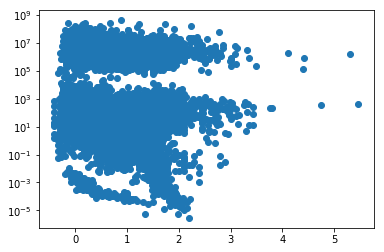

In [38]:
plt.yscale('log')
plt.scatter(cleaned['ci'], cleaned['lum'])

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

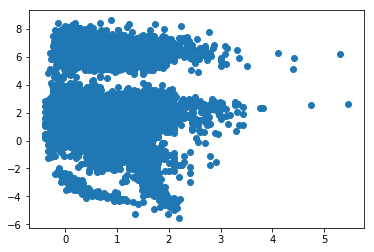

In [41]:
plt.scatter(cleaned['ci'], cleaned['lum'])

In [42]:
kmeans.fit(cleaned[['ci', 'lum']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

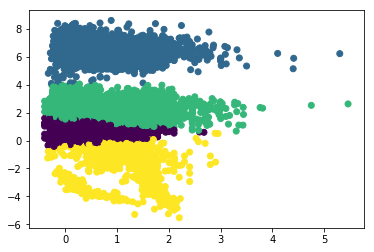

In [43]:
plt.scatter(cleaned['ci'], cleaned['lum'], c=kmeans.labels_)